In [135]:
import numpy as np
import pandas as pd

### loc, iloc

In [136]:
df = pd.Series([0.25, 0.5, 0.75, 1], index=[2, 5, 3, 7])
df

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [137]:
df[2] # indeks eksplisit : selecting

0.25

In [138]:
df[2:3] # indeks implisit : slicing

3    0.75
dtype: float64

In [139]:
# loc
df.loc[3]

0.75

In [140]:
df.loc[2:3]

2    0.25
5    0.50
3    0.75
dtype: float64

In [141]:
# iloc
df.iloc[3]

1.0

In [142]:
# iloc
df.iloc[2:3]

3    0.75
dtype: float64

### Table Manipulation

In [143]:
dict_populasi = {'Jakarta': 7500000,
                 'Bogor': 4900000,
                 'Depok': 3500000,
                 'Tangerang': 2700000,
                 'Bekasi': 6700000}

In [144]:
populasi = pd.Series(dict_populasi)
populasi

Jakarta      7500000
Bogor        4900000
Depok        3500000
Tangerang    2700000
Bekasi       6700000
dtype: int64

In [145]:
dict_luas = {'Jakarta': 73727344,
                 'Bogor': 32584521,
                 'Depok': 24785245,
                 'Tangerang': 30251845,
                 'Bekasi': 35547888}
luas = pd.Series(dict_luas)
luas

Jakarta      73727344
Bogor        32584521
Depok        24785245
Tangerang    30251845
Bekasi       35547888
dtype: int64

In [146]:
daerah = pd.DataFrame({'pop': populasi, 'luas': luas})

In [147]:
daerah

,pop,luas
Jakarta,7500000,73727344
Bogor,4900000,32584521
Depok,3500000,24785245
Tangerang,2700000,30251845
Bekasi,6700000,35547888


In [148]:
daerah['luas']

Jakarta      73727344
Bogor        32584521
Depok        24785245
Tangerang    30251845
Bekasi       35547888
Name: luas, dtype: int64

In [149]:
daerah.luas

Jakarta      73727344
Bogor        32584521
Depok        24785245
Tangerang    30251845
Bekasi       35547888
Name: luas, dtype: int64

In [150]:
daerah['pop_per_area'] = daerah['pop'] / daerah['luas']
daerah

,pop,luas,pop_per_area
Jakarta,7500000,73727344,0.101726
Bogor,4900000,32584521,0.150378
Depok,3500000,24785245,0.141213
Tangerang,2700000,30251845,0.089251
Bekasi,6700000,35547888,0.188478


In [151]:
daerah_tambahan = pd.DataFrame({'Bandung':[500000,1484646,0.180000]})

In [152]:
daerah_tambahan = daerah_tambahan.T
daerah_tambahan.columns = daerah.columns

In [153]:
daerah_tambahan 

,pop,luas,pop_per_area
Bandung,500000.0,1484646.0,0.18


In [154]:
pd.concat([daerah, daerah_tambahan])

,pop,luas,pop_per_area
Jakarta,7500000.0,73727344.0,0.101726
Bogor,4900000.0,32584521.0,0.150378
Depok,3500000.0,24785245.0,0.141213
Tangerang,2700000.0,30251845.0,0.089251
Bekasi,6700000.0,35547888.0,0.188478
Bandung,500000.0,1484646.0,0.180000


In [155]:
daerah = daerah.drop('pop_per_area', axis=1)
daerah

,pop,luas
Jakarta,7500000,73727344
Bogor,4900000,32584521
Depok,3500000,24785245
Tangerang,2700000,30251845
Bekasi,6700000,35547888


In [156]:
daerah.columns

Index(['pop', 'luas'], dtype='object')

In [157]:
daerah.rename(columns={'pop': 'populasi', 'luas': 'luas_m2'}, inplace=True)
daerah

,populasi,luas_m2
Jakarta,7500000,73727344
Bogor,4900000,32584521
Depok,3500000,24785245
Tangerang,2700000,30251845
Bekasi,6700000,35547888


### Pivot Table

In [158]:
dataset = pd.read_csv('Titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
dataset[1:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
columns = ['Survived', 'Name', 'Age']
dataset[columns]

,Survived,Name,Age
0,0,"Braund, Mr. Owen Harris",22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,1,"Heikkinen, Miss. Laina",26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,0,"Allen, Mr. William Henry",35.0
...,...,...,...
886,0,"Montvila, Rev. Juozas",27.0
887,1,"Graham, Miss. Margaret Edith",19.0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,1,"Behr, Mr. Karl Howell",26.0


In [161]:
dataset['Survived'] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [162]:
dataset[dataset['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [163]:
dataset['Age'] > 50

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [164]:
dataset[dataset['Age'] > 50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S


In [165]:
dataset.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [166]:
def make_pivot(param1, param2):
    dataset_slice = dataset[[param1, param2, 'PassengerId']]
    slice_pivot = dataset_slice.pivot_table(index = [param1], columns=[param2], \
                                               aggfunc=np.size, fill_value=0)
    p_chart = slice_pivot.plot(kind='bar');
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height()*1.01))
    return slice_pivot
    return p_chart

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  217

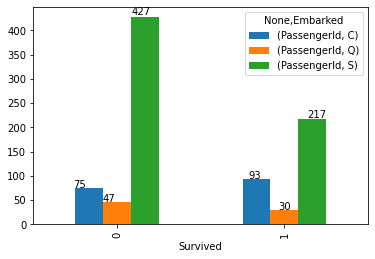

In [167]:
make_pivot('Survived', 'Embarked')

In [168]:
dataset_slice = dataset[['Survived', 'Pclass', 'PassengerId']]
slice_pivot = dataset_slice.pivot_table(index = ['Survived'], columns=['Pclass'], \
                                               aggfunc=np.size, fill_value=0)
slice_pivot

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

In [169]:
dataset_slice = dataset[['Survived', 'Pclass', 'Sex']]
slice_pivot = dataset_slice.pivot_table(index = ['Survived'], columns=['Sex'], \
                                               aggfunc=np.size, fill_value=0)
slice_pivot

Pclass     
Sex      female male
Survived            
0            81  468
1           233  109

In [170]:
dataset_slice.groupby('Sex').mean()

,Survived,Pclass
Sex,,
female,0.742038,2.159236
male,0.188908,2.389948


### Contoh Latihan

In [171]:
tugas = np.random.normal(85, 7, 40)
UTS = np.random.normal(60, 15, 40)
UAS = np.random.normal(75, 10, 40)

In [172]:
nilai = pd.DataFrame({'tugas': tugas,
                      'UTS': UTS,
                      'UAS': UAS})

In [173]:
nilai['nilai_akhir'] = 0.2*nilai['tugas'] + 0.4*nilai['UTS'] + 0.4*nilai['UAS']

In [174]:
bins = [0,20,50,55,60,65,70,75,80,85,100]
labels = ['E', 'D', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A']
nilai['nilai_huruf'] = pd.cut(nilai['nilai_akhir'], bins, labels=labels)

In [175]:
nilai[nilai['nilai_huruf']=='A']

,tugas,UTS,UAS,nilai_akhir,nilai_huruf
2,90.996324,87.530123,86.900598,87.971553,A


In [176]:
nilai[nilai['nilai_huruf']=='B']

,tugas,UTS,UAS,nilai_akhir,nilai_huruf
4,83.081189,73.888223,64.499657,71.971390,B
11,87.411600,46.525314,91.241473,72.589035,B
15,80.945395,66.340358,72.141234,71.581716,B
17,76.554878,53.672401,93.603744,74.221433,B
23,82.750446,61.465640,72.318123,70.063594,B
26,73.054555,75.502445,68.486048,72.206308,B
27,80.543430,71.348362,67.971427,71.836602,B
38,97.228630,71.145430,67.537905,74.919060,B
39,78.309403,50.833261,92.842539,73.132201,B
